https://medium.com/@romandogadin/style-your-visuals-like-the-financial-times-using-plotly-3e7f1d6e293d

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns;


In [2]:
data_quiet_quitters = [['2009','thriving',0.12],['2012','thriving',0.13],['2013','thriving',0.14],
                       ['2014','thriving',0.14],['2015','thriving',0.15],['2016','thriving',0.17],
                       ['2018','thriving',0.19],['2019','thriving',0.22],['2020','thriving',0.20],
                       ['2021','thriving',0.21],['2022','thriving',0.23],

                       ['2009','quiet_q',0.61],['2012','quiet_q',0.64],['2013','quiet_q',0.65],
                       ['2014','quiet_q',0.68],['2015','quiet_q',0.65],['2016','quiet_q',0.66],
                       ['2018','quiet_q',0.64],['2019','quiet_q',0.61],['2020','quiet_q',0.61],
                       ['2021','quiet_q',0.60],['2022','quiet_q',0.59],
                       
                       ['2009','loud_q',0.27],['2012','loud_q',0.23],['2013','loud_q',0.21],
                       ['2014','loud_q',0.18],['2015','loud_q',0.20],['2016','loud_q',0.17],
                       ['2018','loud_q',0.17],['2019','loud_q',0.17],['2020','loud_q',0.19],
                       ['2021','loud_q',0.19],['2022','loud_q',0.18],
                      ]

# create data frame
df = pd.DataFrame(
    data=data_quiet_quitters, 
    columns=['year','type','count'])

In [3]:
# https://python-graph-gallery.com/custom-fonts-in-matplotlib/

from matplotlib.font_manager import FontProperties

# !!! change it to your path
personal_path = '/home/mato/.local/share/fonts/'

# get normal font and store it in `fira_sans_regular`
font_path = personal_path + 'Outfit-Black.ttf'
outfit = FontProperties(fname=font_path)


Falta:
- Font outfit, mas 'bold', pero no tan 'bold'
- Thicks hacia abajo en el eje x
- Leyendas sin recuadro

Listar fonts en terminal:
fc-list | grep "Outfit"


In [4]:
labels=''
# Definimos la paleta de color para las barras
# colors = ["#ae4e6b","#aad3e3","#ef88a8"] 
colors = ['#ff80a8','#bc466b', '#9fd4e2']
color_map = { 
#               "lineas": '#e4d9d0',
              "lineas": '#7d7369',
              "fondo": '#fdf1e6',
              "titulo":'#5c5a5b'
            }

sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(15, 7),
                       dpi=450,
                       facecolor = color_map['fondo']) # Color de fondo del gráfico

ax = sns.histplot(df, x='year', 
                  hue='type', 
                  weights='count',
                  multiple='stack', 
                  shrink=0.9,
                  edgecolor=color_map['fondo'], # Color del borde de las barras 
                  linewidth=3.5,
                  zorder=3
                  )

# Margen
ax.margins(0.01, 0)  

# Definimos grid sólo horizontal
# plt.grid(False)
ax.grid(axis='y', zorder=0)

# Color de fondo del canvas
ax.set_facecolor(color_map['fondo'])

# Color de la línea del eje x
ax.spines['bottom'].set_color(color_map['lineas'])

# Labels sobre las barras
# https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels
# for c in ax.containers:
#     ax.bar_label(c, fmt=lambda x: f'{x:.0%}' if x > 0 else '', 
#                  color='w', 
#                  weight='bold',
#                  padding=-20,
#                  alpha=1)
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0%}' if x > 0 else '', 
#                  label_type='center',
                 color='w', 
                 weight='bold',
                 padding=-20,)

# Longitud del tick del eje y
ax.xaxis.set_tick_params(
                        length=6,
                        color= color_map['lineas']
)
ax.yaxis.set_tick_params(
                        length=0,
                        color= color_map['lineas']
)
# Labels de los ticks del eje y
ax.set_yticks([0,.2,.40,.60,.80,1])
ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
# Font de los ticks
plt.xticks(font=outfit)
plt.yticks(font=outfit);
# Colores de los ticks names
ax.tick_params(colors=color_map['lineas']) # Puede incluir axis='x' para sólo colorear el eje x

# No ponemos titulo al eje Y ni al X
plt.ylabel('')
plt.xlabel('')

# Eliminamos el eje x (top), y (right) e y (left)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Eliminamos la leyenda que Matplolib inserta por defecto
ax.get_legend().remove()

# Leyendas
fig.legend(
           bbox_to_anchor=(0.31, 1.03),
           fancybox = True,
           fontsize='medium', 
           labels=['Loud quitting (% actively disengaged)',
                   'Quiet quitting (% not engaged)',
                   'Thriving at work (% engaged)',],
           edgecolor = color_map['fondo'],
           facecolor = 'none'
)

# Coordinadas para linea negra y cuadro ojo
y_pos = 1.25
x_pos = -0.95
# Linea negra sobre título
ax.add_patch(Rectangle((x_pos,y_pos+0.08),1,0.01,color='black', clip_on=False))
# Cuadro rojo en título
ax.add_patch(Rectangle((x_pos,y_pos-0.01),2.32,0.07,color='#bc4668', clip_on=False, alpha=0.7))

# Títulos
plt.suptitle("'Quiet quitters' make up the majority of employees globally", 
             fontsize=24, 
             y=y_pos-0.14, x=0.41,
             color=color_map['titulo'], 
             font=outfit,
            );



In [5]:
data = [['2005','A',.10],['2006','A',.15],['2007','A',.10],
                       ['2005','B',.15],['2006','B',.70],['2007','B',.10],
                       ['2005','C',.75],['2006','C',.15],['2007','C',.80]
                      ]


df = pd.DataFrame(
    data=data, 
    columns=['year','type','count'])

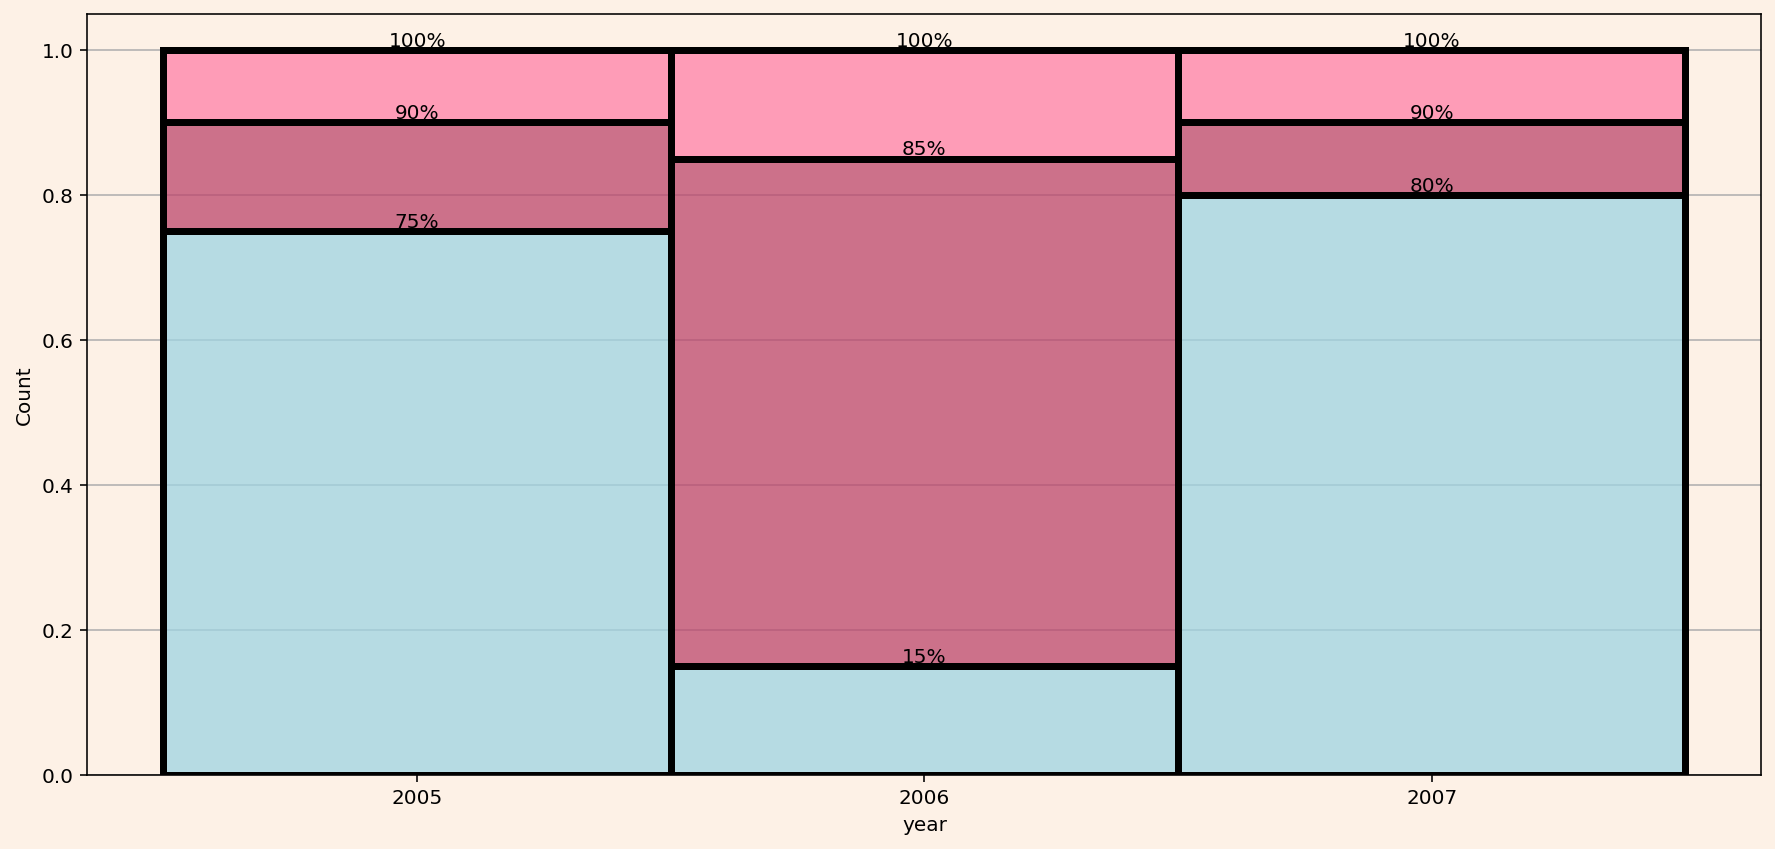

In [6]:
fig, ax = plt.subplots(figsize=(15, 7),facecolor = '#fdf1e6')
ax.set_facecolor('#fdf1e6')

ax = sns.histplot(df, x='year', 
                  hue='type', 
                  weights='count',
                  multiple='stack', 
                  shrink=1,
                  linewidth=3.5,
                  zorder=3
                  )


# Definimos grid sólo horizontal
# plt.grid(False)
ax.grid(axis='y', zorder=0)

ax.get_legend().remove()

for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{x:.0%}' if x > 0 else '')